<a href="https://colab.research.google.com/github/yash309/RedWineQuality_Classification/blob/master/RedWineQuality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df=pd.read_csv("winequality-red.csv")

In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#Classify The Quality
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")
       


In [0]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
category
data = pd.concat([df,category],axis=1)
data
data.drop(columns="quality",axis=1,inplace=True)

In [74]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


##Exploratory Data Analysis
Here I counted the number of each class and checked correlation of the columns

Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

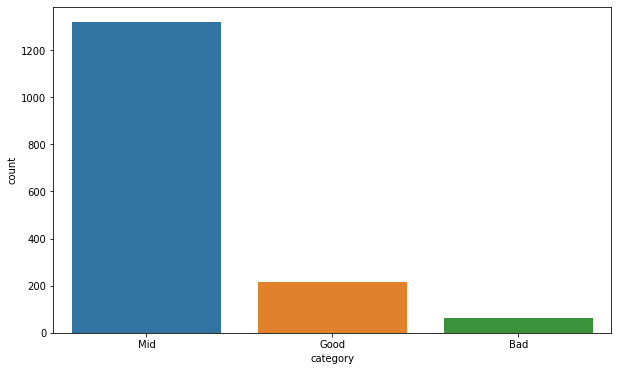

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"])
data["category"].value_counts()

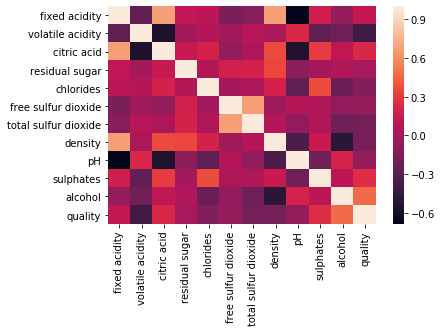

In [76]:
sns.heatmap(df.corr())

**Setting features, labels and Encoding the categorical data**

**(good=1, med=2, bad=3)** 

In [77]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values
y

array(['Mid', 'Mid', 'Mid', ..., 'Mid', 'Mid', 'Mid'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 2, 2, 2])

##Training and Testing Data
We've explored the data now we split the data into training and testing sets.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [0]:
#Scaling the data for optimise predictions
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# KNN

In [81]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# DecisionTree(GINI)

In [82]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)
pred_clfgtree=clf.predict(X_test)
print(classification_report(y_test, pred_clfgtree))

              precision    recall  f1-score   support

           0       0.09      0.08      0.08        13
           1       0.40      0.63      0.49        30
           2       0.92      0.87      0.89       277

    accuracy                           0.82       320
   macro avg       0.47      0.53      0.49       320
weighted avg       0.84      0.82      0.82       320



# DecisionTree(ID3)

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
pred_clfitree=clf.predict(X_test)
print(classification_report(y_test, pred_clfitree))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.42      0.53      0.47        30
           2       0.92      0.91      0.91       277

    accuracy                           0.85       320
   macro avg       0.57      0.56      0.56       320
weighted avg       0.85      0.85      0.85       320



In [84]:
from id3 import Id3Estimator
id3 = Id3Estimator()
id3=id3.fit(X_train,y_train)
pred_id3tree=id3.predict(X_test)
print(classification_report(y_test, pred_id3tree))


              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.42      0.60      0.49        30
           2       0.94      0.90      0.92       277

    accuracy                           0.85       320
   macro avg       0.58      0.60      0.59       320
weighted avg       0.87      0.85      0.86       320



# NaiveBayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb=nb.fit(X_train,y_train)
pred_nb=nb.predict(X_test)
print(classification_report(y_test, pred_nb))


              precision    recall  f1-score   support

           0       0.11      0.08      0.09        13
           1       0.33      0.80      0.47        30
           2       0.93      0.80      0.86       277

    accuracy                           0.77       320
   macro avg       0.46      0.56      0.47       320
weighted avg       0.84      0.77      0.79       320



# LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf = clf.fit(X_train,y_train)
pred_lr=clf.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.45      0.33      0.38        30
           2       0.89      0.96      0.92       277

    accuracy                           0.86       320
   macro avg       0.45      0.43      0.44       320
weighted avg       0.81      0.86      0.83       320



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.66      0.63      0.64        30
           2       0.92      0.96      0.94       277

    accuracy                           0.89       320
   macro avg       0.52      0.53      0.53       320
weighted avg       0.86      0.89      0.87       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion
As a result, we can see KNN model has the best accurary ratio for predicting our wine quality!

In [89]:
conclusion = pd.DataFrame({'models': ["KNN","DecisionTree(GINI)","DecisionTree(ID3)","NaiveBayes","LogisticRegression"],
                           'accuracies': [accuracy_score(y_test, pred_knn),accuracy_score(y_test, pred_clfgtree),accuracy_score(y_test, pred_clfitree),accuracy_score(y_test, pred_nb),accuracy_score(y_test, pred_lr)]})
conclusion

,models,accuracies
0,KNN,0.875000
1,DecisionTree(GINI),0.815625
2,DecisionTree(ID3),0.846875
3,NaiveBayes,0.768750
4,LogisticRegression,0.859375
